# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


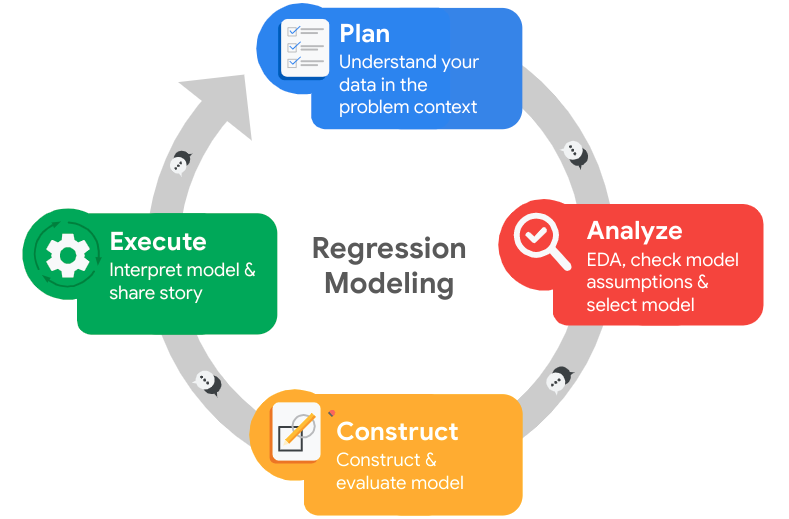

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

HR Department of Salifort Motors

- What are you trying to solve or accomplish?

Build a model to determine the causes for employees resigning, to improve employee satisfaction level and retection.

- What are your initial observations when you explore the data?

Data has 15000 entries and 10 columns. There are 3008 duplicates in the data. There are no null values

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

numpy, pandas
- Do you have any ethical considerations in this stage?

Ethical considerations would be to minimize personal bias towards the employees and take an impartial approach. Working hours, work accidents etc., are some of the variables to be considered.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [203]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_curve, roc_auc_score, RocCurveDisplay

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [204]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [205]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [206]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [207]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [208]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Department':'department',
                           'Work_accident':'accidents',
                           'average_montly_hours':'avg_monthly_hrs',
                           'time_spend_company':'tenure',
                           'satisfaction_level':'satisfaction',
                           'last_evaluation':'evaluation',
                           'number_project':'projects',
                           'promotion_last_5years':'promotion'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'evaluation', 'projects', 'avg_monthly_hrs', 'tenure',
       'accidents', 'left', 'promotion', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [209]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction       0
evaluation         0
projects           0
avg_monthly_hrs    0
tenure             0
accidents          0
left               0
promotion          0
department         0
salary             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [210]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [211]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep=False)]

,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [212]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df.duplicated().value_counts())
df.head(10)

False    11991
dtype: int64


,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'outliers for tenure')

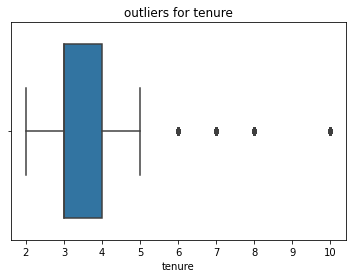

In [213]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df['tenure'])
plt.title('outliers for tenure')

In [214]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print(len(outliers))

824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
The variables seem to have a positive correlation. Satisfaction level and left variables have a negative correlation.
- What do you observe about the distributions in the data?
There is a large number of employees working over 266 hours per month. Most of these employees have left.
- What transformations did you make with your data? Why did you chose to make those decisions?
Duplicates were dropped and columns renamed to match snake_case. This cleans the data for a better analysis and results.
- What are some purposes of EDA before constructing a predictive model?
EDA gives us insights into the data. It tells us the data types and which variables to consider for our predictive model. It also gives us the correlation of the variables. A initial analysis giving an overview of the causes of the problem and the probable solution can be assumed after EDA.

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
seaborn and matplotlib

- Do you have any ethical considerations in this stage?
The company's employees are being overworked which seem to be a factor in employees leaving. This has to be predicted by our model before we make an assumption.



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [215]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize=True)

0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'average monthly hours vs projects')

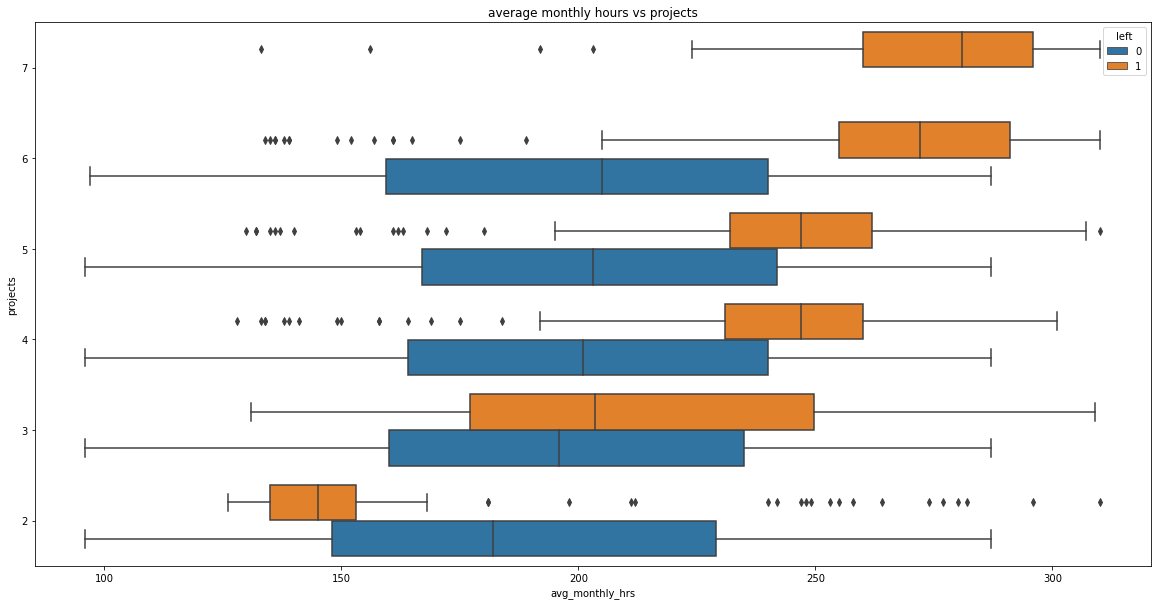

In [216]:
# Create a plot as needed
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df['avg_monthly_hrs'], y=df['projects'], hue=df['left'], orient='h')
ax.invert_yaxis()
plt.title('average monthly hours vs projects')

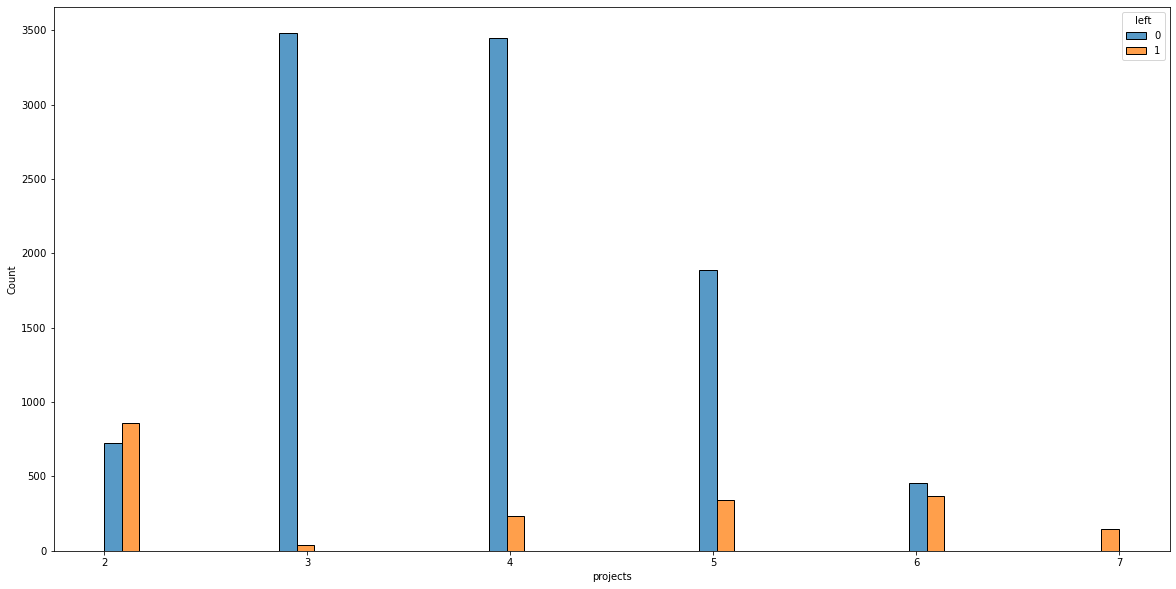

In [217]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10))
sns.histplot(x=df['projects'], hue=df['left'], multiple='dodge')

In [218]:
# Create a plot as needed
### YOUR CODE HERE ###
df[df['projects'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

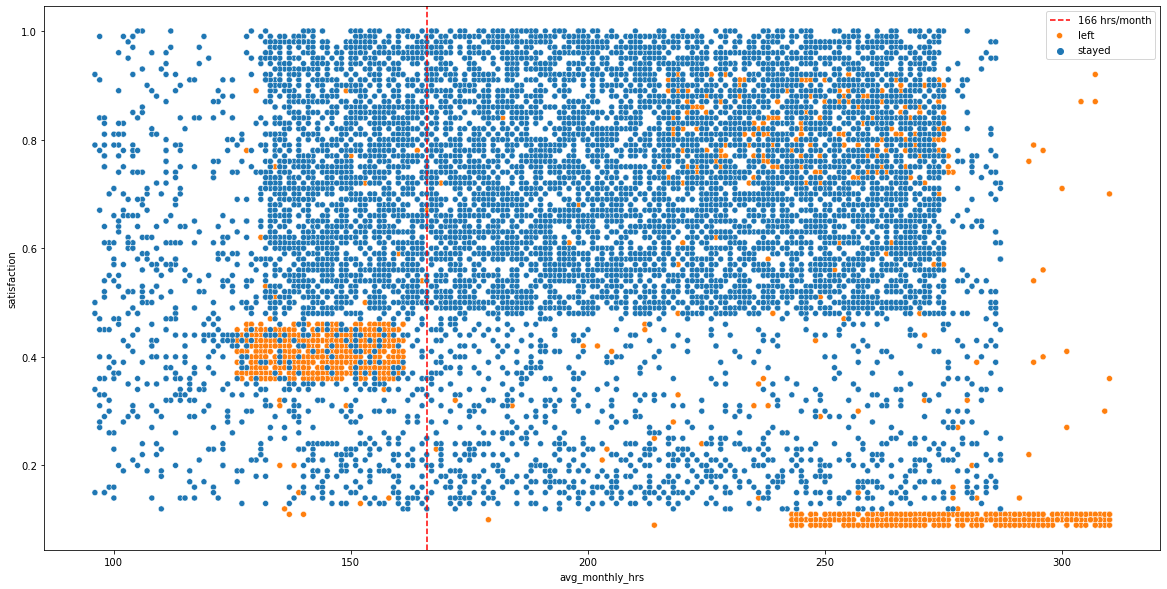

In [219]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['avg_monthly_hrs'], y=df['satisfaction'], hue=df['left'])
plt.axvline(x=166,color='red',ls='--',label='166 hrs / month')
plt.legend(labels=['166 hrs/month','left','stayed'])

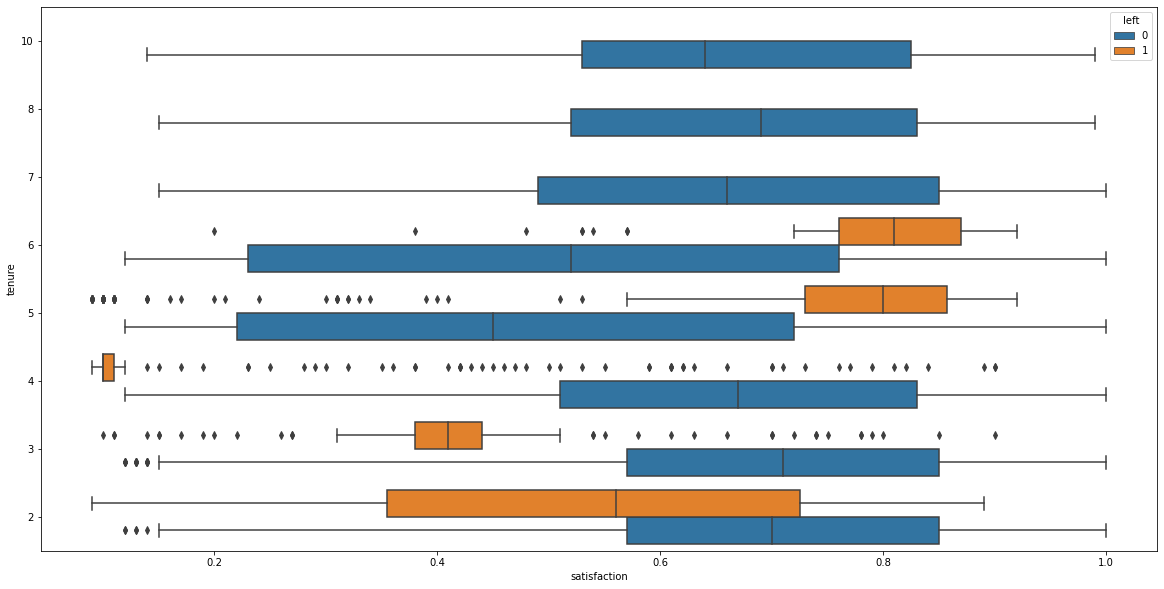

In [220]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df['satisfaction'], y=df['tenure'], hue=df['left'], orient='h')
ax.invert_yaxis()

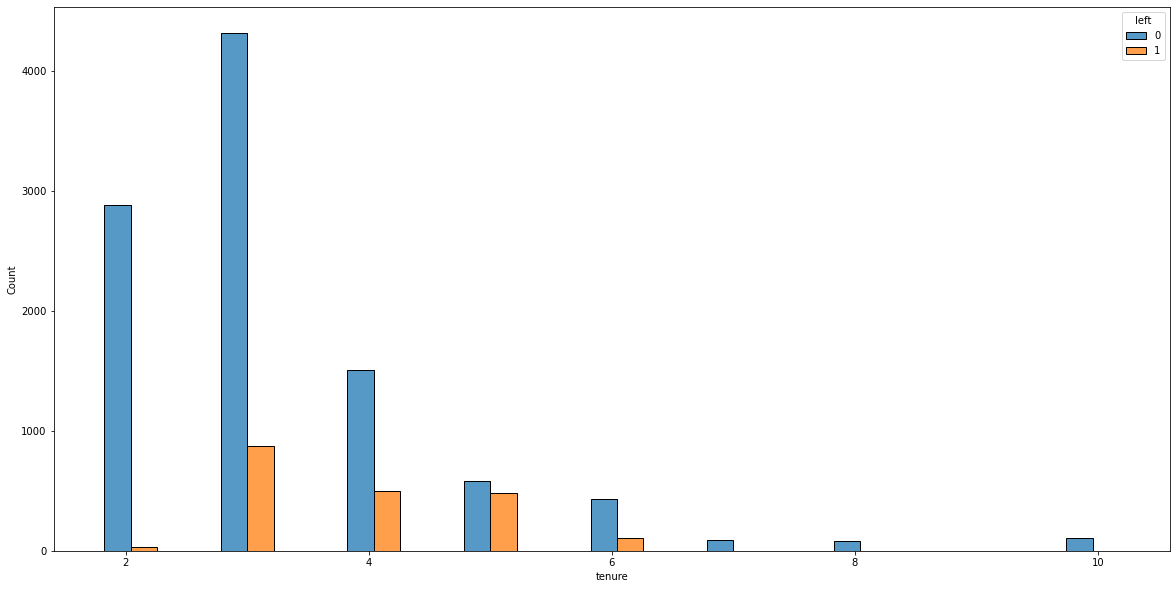

In [221]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,10))
sns.histplot(x=df['tenure'], hue=df['left'], multiple='dodge', shrink=5)

In [222]:
# Create a plot as needed
### YOUR CODE HERE ###
df.groupby('left')['satisfaction'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


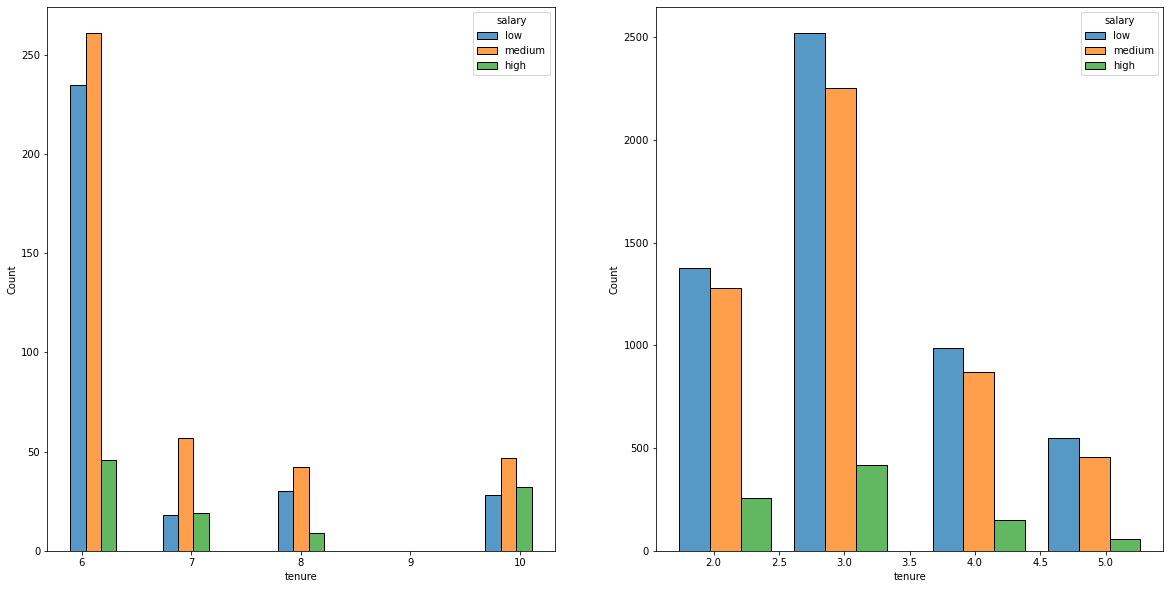

In [223]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, axes = plt.subplots(1,2,figsize=(20,10))
sns.histplot(x=df[df['tenure'] >= 6]['tenure'], hue=df['salary'], multiple='dodge', ax=axes[0], shrink=2)
sns.histplot(x=df[df['tenure'] < 6]['tenure'], hue=df['salary'], multiple='dodge', ax=axes[1], shrink=4)

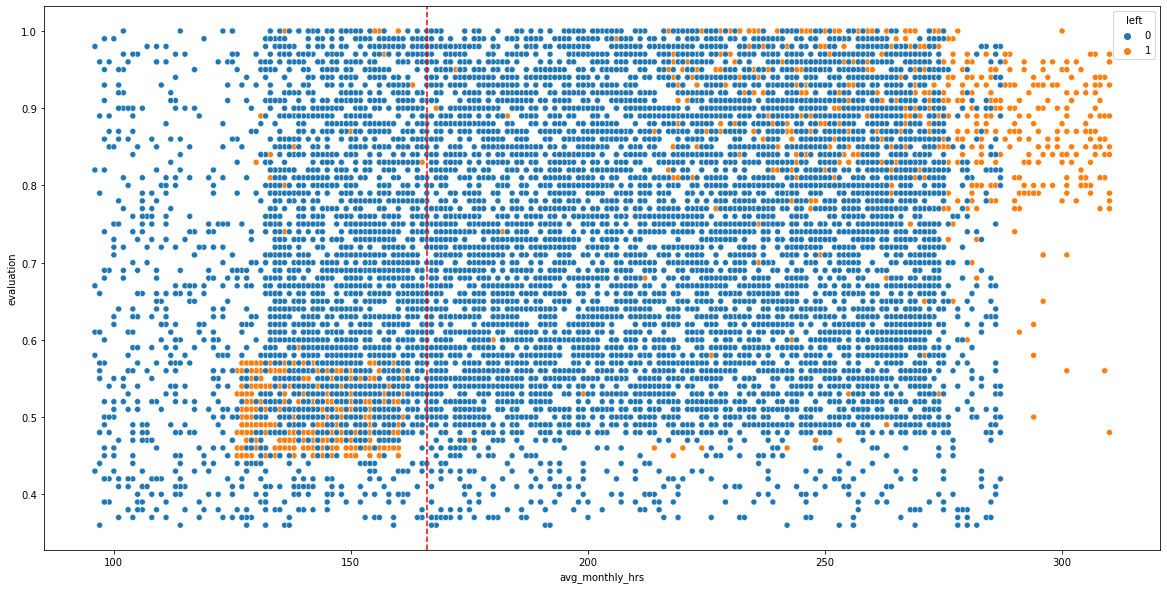

In [224]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df['avg_monthly_hrs'], y=df['evaluation'], hue=df['left'])
ax.axvline(x=166, color='red', linestyle='--')

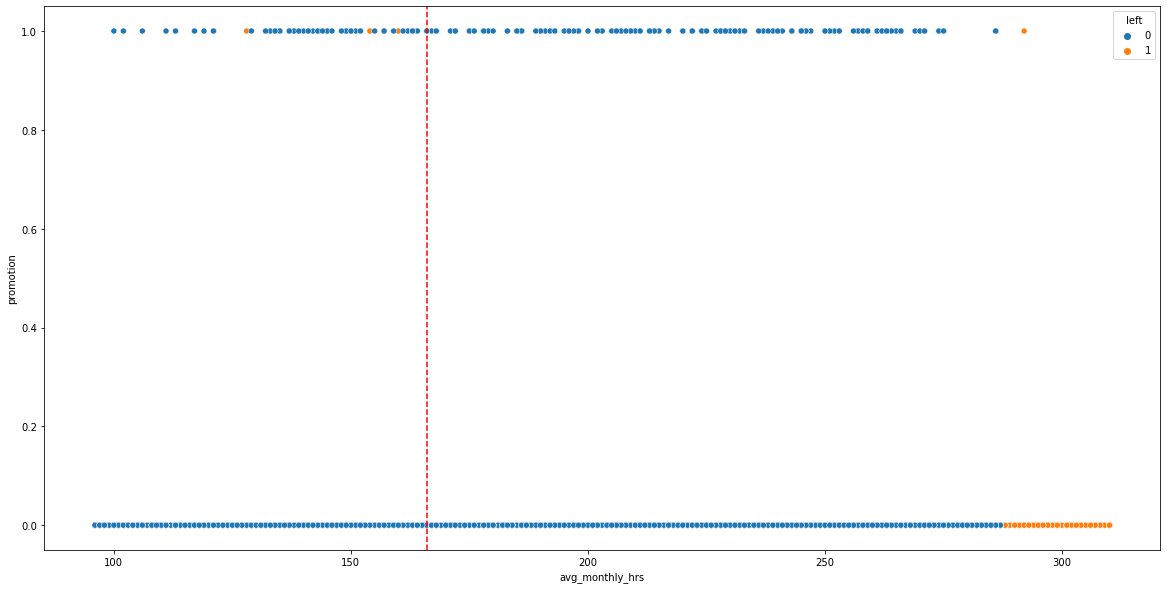

In [225]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x=df['avg_monthly_hrs'], y=df['promotion'], hue=df['left'])
ax.axvline(x=166,color='red',linestyle='--')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

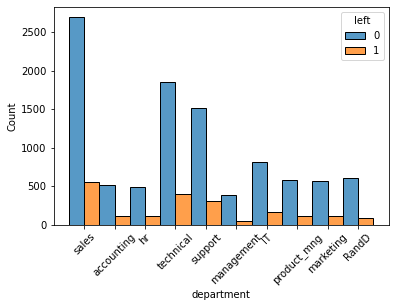

In [226]:
sns.histplot(x=df['department'], hue=df['left'],multiple='dodge')
plt.xticks(rotation=45)

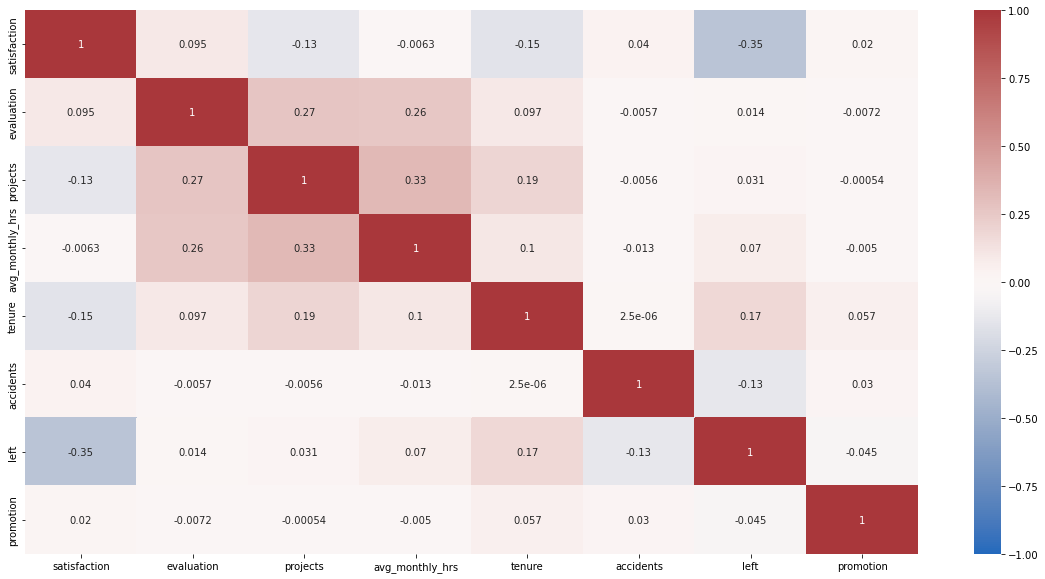

In [227]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap=sns.color_palette('vlag',as_cmap=True), vmin=-1,vmax=1)

### Insights

there is slight positive correlation between the variables and satisfaction level and retention is negatively correlated as expected. There is a large number of employees working over 266 hours per month. Employees with more than 6 projects have left in a greater proportion. Employees with 7 projects have all left. Employees who are overworked without promotion have a majority resigning from the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
The variable 'left was chosen as it represents our outcome which is whether an employee will leave the company or not.

- Are each of the assumptions met?
The assumptions for each of the models have been met.

- How well does your model fit the data?
The scores for each of the models is given in the final results table.

- Can you improve it? Is there anything you would change about the model?
Feature engineering and upsampling of the data can improve the models.

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
LogisticRegression, RandomForestClassification, XGBClassification, DecisionTreeClassification.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

left is either 1 or 0 so it is a binary prediction and we can use a classifier for it as the outcome variable is a discrete variable.

### Identify the types of models most appropriate for this task.

Binary logistic classification

### Modeling

Add as many cells as you need to conduct the modeling process.

In [228]:
### YOUR CODE HERE ###
df.tail()

,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,department,salary
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high
11999,0.50,0.73,4,180,3,0,0,0,IT,low


In [229]:
df_blc = df.copy()
#salary and department are the 2 categorical variables. 'left' will be the outcome variable. One hot encoding using
#pd.get_dummies() is used for department. 'Salary' has a hierarchy and has to be label encoded using cat.codes
df_blc['salary'] = (df_blc['salary'].astype('category')
                   .cat.set_categories(['low','medium','high'])
                   .cat.codes )
df_blc.tail()

,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,department,salary
11995,0.90,0.55,3,259,10,1,0,1,management,2
11996,0.74,0.95,5,266,10,0,0,1,management,2
11997,0.85,0.54,3,185,10,0,0,1,management,2
11998,0.33,0.65,3,172,10,0,0,1,marketing,2
11999,0.50,0.73,4,180,3,0,0,0,IT,0


In [230]:
#One Hot Encoding
#drop first is false since we need all the departments for our classification
df_blc = pd.get_dummies(df_blc, drop_first=False)
df_blc.head()

,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


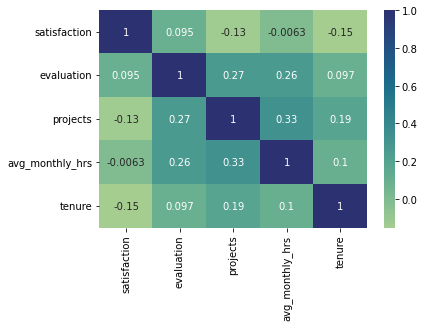

In [231]:
sns.heatmap(df_blc[['satisfaction','evaluation','projects','avg_monthly_hrs','tenure']].corr(),annot=True,cmap='crest')

In [232]:
df_blc = df_blc[(df_blc['tenure'] >= lower_limit) & (df_blc['tenure'] <= upper_limit)]
df_blc.head()
df_blc.shape

(11167, 19)

In [233]:
y = df_blc['left']
X = df_blc.drop('left',axis=1)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size=0.25, stratify=y_train, random_state=42)

In [235]:
#Logistic Regression
log_clf = LogisticRegression(random_state=42)
cv_params = {'max_iter':[400]}
scoring = {'accuracy','precision','recall','f1','roc_auc'}
log_clf_cv = GridSearchCV(log_clf, cv_params, scoring=scoring, refit='roc_auc')

In [236]:
%%time
log_clf_cv.fit(X_tr,y_tr)

CPU times: user 1min 26s, sys: 1min 34s, total: 3min 1s
Wall time: 1min 30s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'max_iter': [400]},
             pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score=False,
             scoring={'accuracy', 'recall', 'roc_auc', 'f1', 'precision'},
             verbose=0)

In [237]:
y_pred = log_clf_cv.predict(X_val)

In [238]:
log_clf_cv.best_score_

0.8903198303878941

In [239]:
log_clf_cv.best_params_

{'max_iter': 400}

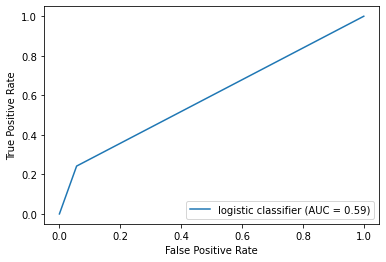

In [242]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='logistic classifier')
display.plot()
plt.show()

In [243]:
def make_results(model_name:str, model_object, metric:str) :
    metric_dict = {'precision':'mean_test_precision',
                  'accuracy':'mean_test_accuracy',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1',
                  'auc':'mean_test_roc_auc'}
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]
    
    auc = best_estimator_results.mean_test_roc_auc
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame({'name':[model_name],
                         'accuracy':[accuracy],
                         'precision':[precision],
                         'recall':[recall],
                         'f1':[f1],
                         'roc_auc':[auc]})
    return table

In [244]:
log_clf_cv_results = pd.DataFrame({'name':['logistic_regression'],
                      'accuracy':[accuracy_score(y_val,y_pred)],
                     'precision':[precision_score(y_val,y_pred)],
                     'recall':[recall_score(y_val,y_pred)],
                     'f1':[f1_score(y_val,y_pred)],
                     'roc_auc':[roc_auc_score(y_val,y_pred)]})
log_clf_cv_results

,name,accuracy,precision,recall,f1,roc_auc
0,logistic_regression,0.825425,0.464286,0.242021,0.318182,0.592754


In [245]:
target_names = ['predicted would not leave', 'predicted will leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.94      0.90      1858
     predicted will leave       0.46      0.24      0.32       376

                 accuracy                           0.83      2234
                macro avg       0.66      0.59      0.61      2234
             weighted avg       0.79      0.83      0.80      2234



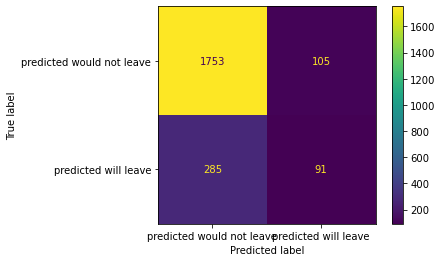

In [246]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(values_format='')

In [247]:
#Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
cv_params = {'max_depth':[3,4,5,None],
            'min_samples_leaf':[5,6,7],
            'min_samples_split':[1,2,3],
            }
scoring = {'precision','recall','accuracy','f1','roc_auc'}
tree_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [248]:
%%time
tree_cv.fit(X_train,y_train)

CPU times: user 2.12 s, sys: 0 ns, total: 2.12 s
Wall time: 2.11 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, None],
                         

In [249]:
tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [250]:
tree_cv.best_score_

0.9736145667824282

In [280]:
y_pred = tree_cv.best_estimator_.predict(X_val)

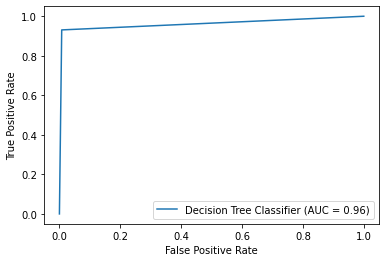

In [281]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()
plt.show()

In [282]:
tree_cv_results = make_results('decision_tree_classifier',tree_cv,'auc')
final_results = pd.concat([tree_cv_results,log_clf_cv_results],axis=0)

In [283]:
final_results

,name,accuracy,precision,recall,f1,roc_auc
0,decision_tree_classifier,0.977498,0.952119,0.912292,0.931734,0.973615
0,logistic_regression,0.825425,0.464286,0.242021,0.318182,0.592754


In [284]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
cv_params = {'max_depth':[5],
            'max_features':[1.0],
             'max_samples':[0.6],
            'min_samples_leaf':[1],
            'min_samples_split':[5],
            'n_estimators':[400]}
scoring = {'accuracy','precision','recall','f1','roc_auc'}
rf_cv = GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit='roc_auc')

In [285]:
%%time
rf_cv.fit(X_tr, y_tr)

CPU times: user 10.4 s, sys: 0 ns, total: 10.4 s
Wall time: 10.4 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [286]:
pickle.dump(rf_cv,open('rf_cv.pickle','wb'))
pickle.dump(log_clf_cv,open('log_clf_cv.pickle','wb'))
pickle.dump(tree_cv,open('tree_cv.pickle','wb'))

In [287]:
rf_cv = pickle.load(open('rf_cv.pickle','rb'))
log_clf_cv = pickle.load(open('log_clf_cv.pickle','rb'))
tree_cv = pickle.load(open('tree_cv.pickle','rb'))

In [288]:
rf_cv.best_score_

0.980638188497517

In [289]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [290]:
y_pred = rf_cv.best_estimator_.predict(X_val)

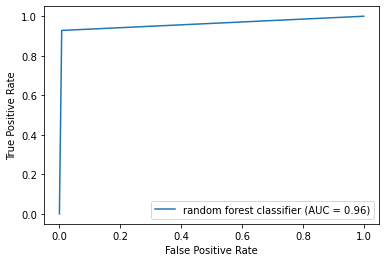

In [291]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='random forest classifier')
display.plot()
plt.show()

In [292]:
rf_cv_results = make_results('random_forest_classifier',rf_cv,'auc')
final_results = pd.concat([final_results,rf_cv_results],axis=0)

In [293]:
final_results

,name,accuracy,precision,recall,f1,roc_auc
0,decision_tree_classifier,0.977498,0.952119,0.912292,0.931734,0.973615
0,logistic_regression,0.825425,0.464286,0.242021,0.318182,0.592754
0,random_forest_classifier,0.979848,0.963795,0.914973,0.938675,0.980638


In [294]:
#xgb boost using just one hyperparameter due to processing constraints
xgb = XGBClassifier(objective='binary:logistic',random_state=42)
cv_params = {'max_depth':[None],
            'min_child_weight':[5],
            'learning_rate':[0.1],
            'n_estimators':[5],
            'subsample':[0.7]}
scoring = {'accuracy','precision','recall','f1','roc_auc'}
xgb_cv = GridSearchCV(xgb,cv_params,scoring=scoring,cv=5,refit='roc_auc')

In [295]:
xgb_cv.fit(X_tr,y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0

In [296]:
xgb_cv.best_score_

0.9735856613512832

In [298]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'min_child_weight': 5,
 'n_estimators': 5,
 'subsample': 0.7}

In [299]:
y_pred = xgb_cv.best_estimator_.predict(X_val)

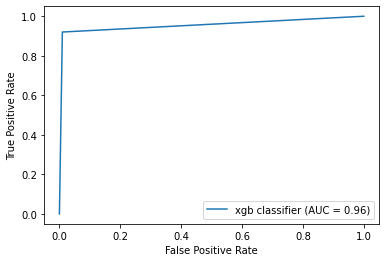

In [301]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='xgb classifier')
display.plot()
plt.show()

In [302]:
xgb_cv_results = make_results('xgb_classifier',xgb_cv,'auc')
final_results = pd.concat([final_results,xgb_cv_results],axis=0)
final_results

,name,accuracy,precision,recall,f1,roc_auc
0,decision_tree_classifier,0.977498,0.952119,0.912292,0.931734,0.973615
0,logistic_regression,0.825425,0.464286,0.242021,0.318182,0.592754
0,random_forest_classifier,0.979848,0.963795,0.914973,0.938675,0.980638
0,xgb_classifier,0.976414,0.955143,0.902576,0.928037,0.973586


In [308]:
X
#feature engineering
print('Max average monthly hours worked :',df_blc['avg_monthly_hrs'].max())
print('Min average monthly hours worked :',df_blc['avg_monthly_hrs'].min())
print('mean average monthly hours worked :',df_blc['avg_monthly_hrs'].mean())

Max average monthly hours worked : 310
Min average monthly hours worked : 96
mean average monthly hours worked : 200.14453299901496


In [310]:
df_blc['overworked'] = (df_blc['avg_monthly_hrs'] > df_blc['avg_monthly_hrs'].mean()).astype(int)
df_blc

,satisfaction,evaluation,projects,avg_monthly_hrs,tenure,accidents,left,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1


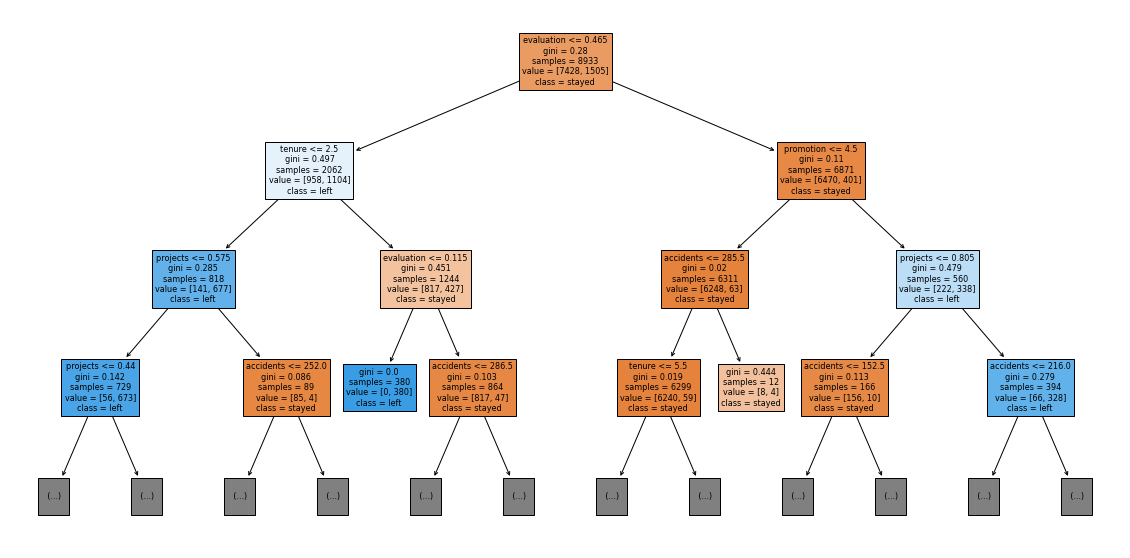

In [311]:
plt.figure(figsize=(20,10))
plot_tree(tree_cv.best_estimator_, max_depth=3, class_names={0:'stayed',1:'left'}, feature_names=X.columns,filled=True)
plt.show()

In [313]:
tree_importances = pd.DataFrame(tree_cv.best_estimator_.feature_importances_,
                               columns=['gini_importance'], index=df_blc.drop(['left','overworked'],axis=1).columns)
tree_importances = tree_importances.sort_values(by=['gini_importance'],ascending=False)
tree_importances

,gini_importance
satisfaction,0.555935
tenure,0.168789
evaluation,0.140696
projects,0.108530
avg_monthly_hrs,0.026050
department_hr,0.000000
department_support,0.000000
department_sales,0.000000
department_product_mng,0.000000
department_marketing,0.000000


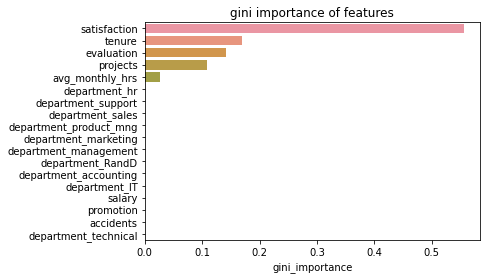

In [314]:
sns.barplot(x=tree_importances['gini_importance'], y=tree_importances.index)
plt.title('gini importance of features')
plt.show()

In [316]:
rf_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, index=df_blc.drop(['left','overworked'],axis=1).columns, columns=['gini importance'])
rf_importances

,gini importance
satisfaction,0.527500
evaluation,0.110091
projects,0.133490
avg_monthly_hrs,0.061749
tenure,0.164554
accidents,0.000079
promotion,0.000000
salary,0.000518
department_IT,0.000138
department_RandD,0.000389


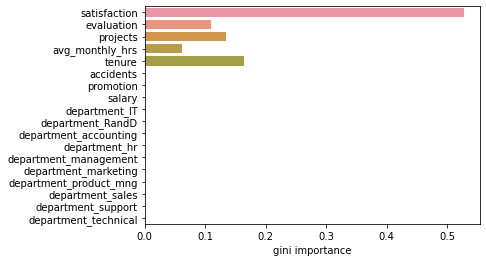

In [317]:
sns.barplot(x=rf_importances['gini importance'], y=rf_importances.index)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
The employees are overworked with low promotions. They are working on several projects at the same time. The salary breakdown indicates a larger portion in the low bracket. The employees who have worked for several years have a good evaluation score but have shown a low satisfaction level indicating discontent with working conditions.

- What business recommendations do you propose based on the models built?
The recommendations to improve employee retention is to reduce the number of working hours for all employees and the number of projects. Re-evaluate the criteria for promotions so that a larger percentage of employees who have been working at the company for more than 5 years would receive promotions.

- Do you think your model could be improved? Why or why not? How?
The model can be improved by upsampling to balance the classes. The number of employees who have left is less than 20% of the overall data. Some more information regarding factors affecting the satisfaction level of employees would be helpful in giving a better prediction.

Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.